In [1]:
# I think the mesh plots should scale comleteness values like magnitudes
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
import rubin_sim.maf as maf

In [2]:
m1 = pd.DataFrame({'completeness 1-2%': 0.01, 'completeness 50-51%': 0.5, 'completeness 98-99%': 0.98}, index=['baseline'])
m2 =  pd.DataFrame({'completeness 1-2%': 0.02, 'completeness 50-51%': 0.51, 'completeness 98-99%':0.99}, index=['new run'])
data = pd.concat([m1,m2])
data

,completeness 1-2%,completeness 50-51%,completeness 98-99%
baseline,0.01,0.50,0.98
new run,0.02,0.51,0.99


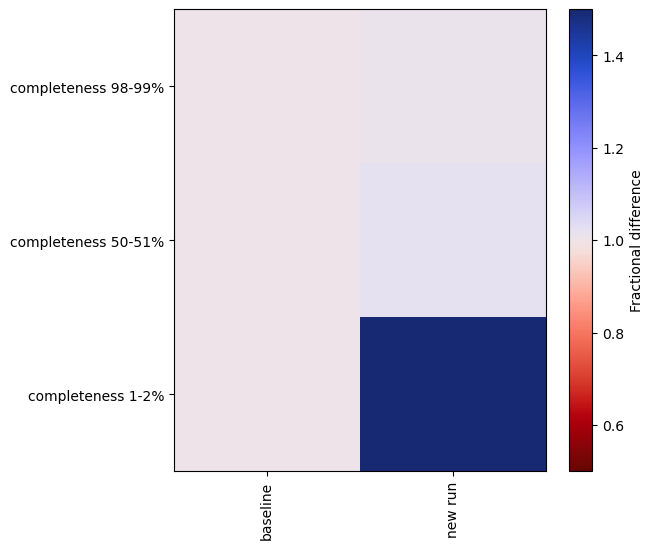

In [3]:
fig, ax = maf.plot_run_metric_mesh(data, baseline_run='baseline')

In [4]:
# what if we use raw numbers?
m1 = pd.DataFrame({'completeness 1-2%': 10, 'completeness 50-51%': 500, 'completeness 98-99%': 980}, index=['baseline'])
m2 =  pd.DataFrame({'completeness 1-2%': 20, 'completeness 50-51%': 510, 'completeness 98-99%':990}, index=['new run'])
data = pd.concat([m1,m2])
data

,completeness 1-2%,completeness 50-51%,completeness 98-99%
baseline,10,500,980
new run,20,510,990


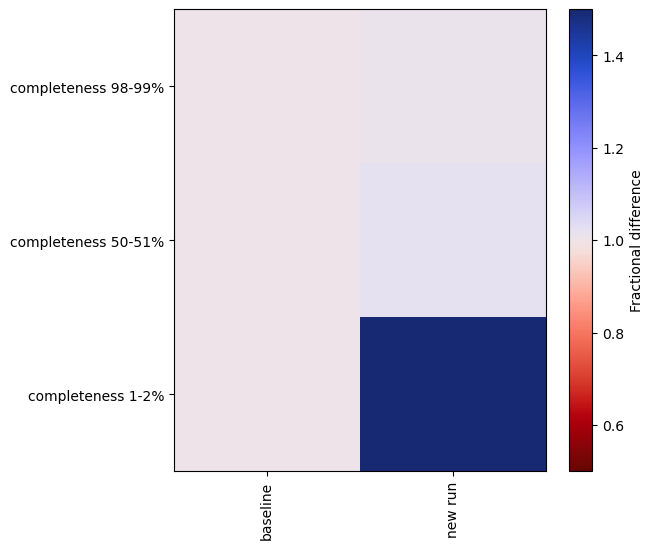

In [5]:
fig, ax = maf.plot_run_metric_mesh(data, baseline_run='baseline')

In [6]:
# But, if we use (the completely undocumented) metric_set kwarg to tell the plotter to treat these 
# like magnitudes
m1 = pd.DataFrame({'completeness 1-2%': 0.01, 'completeness 50-51%': 0.5, 'completeness 98-99%': 0.98}, index=['baseline'])
m2 =  pd.DataFrame({'completeness 1-2%': 0.02, 'completeness 50-51%': 0.51, 'completeness 98-99%':0.99}, index=['new run'])
data = pd.concat([m1,m2])

metric_set1 = pd.DataFrame({'metric': 'completeness 1-2%', 'short_name': 'completeness 1-2%', 'style': None, 'invert': False, 'mag': True}, index=['completeness 1-2%'])
metric_set2 = pd.DataFrame({'metric': 'completeness 50-51%', 'short_name': 'completeness 50-51%', 'style': None, 'invert': False, 'mag': True}, index=['completeness 50-51%'])
metric_set3 = pd.DataFrame({'metric': 'completeness 98-99%', 'short_name': 'completeness 98-99%', 'style': None, 'invert': False, 'mag': True}, index=['completeness 98-99%'])
metric_set = pd.concat([metric_set1, metric_set2, metric_set3])
metric_set.index.name = 'metric'

In [7]:
metric_set

,metric,short_name,style,invert,mag
metric,,,,,
completeness 1-2%,completeness 1-2%,completeness 1-2%,None,False,True
completeness 50-51%,completeness 50-51%,completeness 50-51%,None,False,True
completeness 98-99%,completeness 98-99%,completeness 98-99%,None,False,True


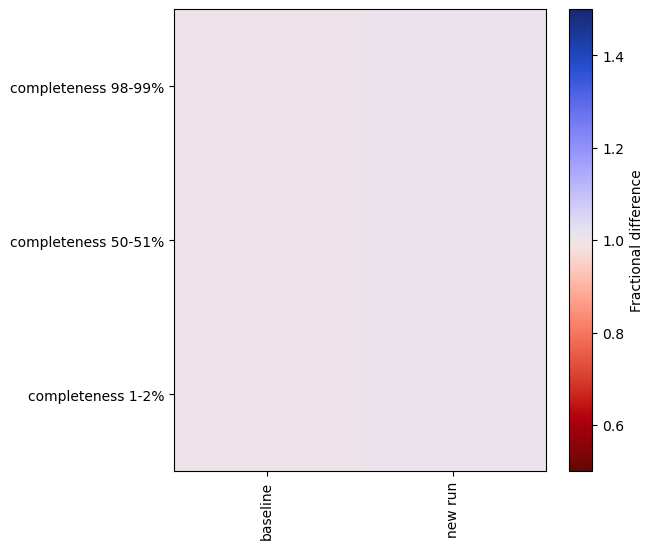

In [8]:
# now this looks better
fig, ax = maf.plot_run_metric_mesh(data, baseline_run='baseline', metric_set=metric_set)

Text(0.5, 1.0, 'Default')

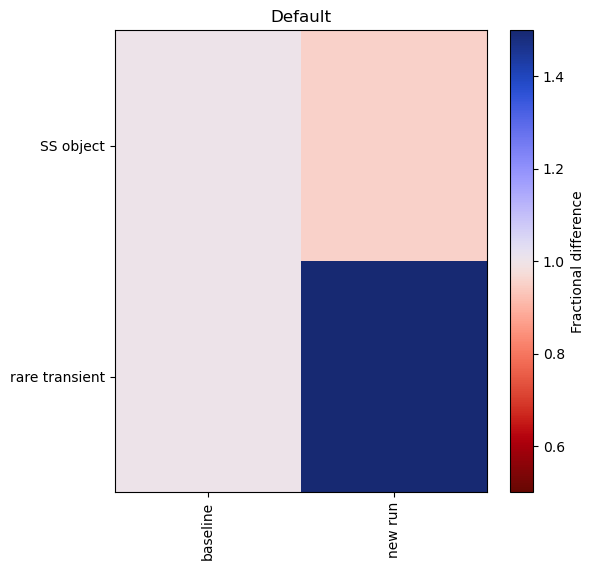

In [15]:
# why it matters, let's look at a situation where rare transient goes from 1-2% and 
# some solar system object drops from 99 to 94

m1 = pd.DataFrame({'rare transient': 0.01, 'SS object': 0.99}, index=['baseline'])
m2 =  pd.DataFrame({'rare transient': 0.02, 'SS object': 0.94}, index=['new run'])
data = pd.concat([m1,m2])
fig, ax = maf.plot_run_metric_mesh(data, baseline_run='baseline')
ax.set_title('Default')

Text(0.5, 1.0, 'Completeness as mag')

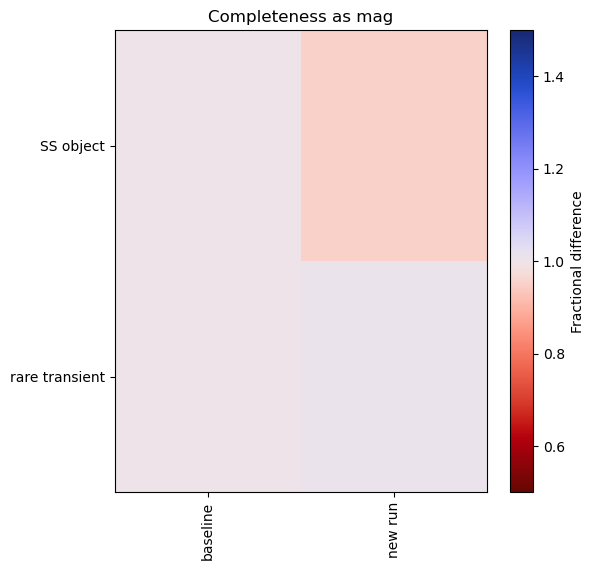

In [16]:
metric_set1 = pd.DataFrame({'metric': 'rare transient', 'short_name': 'rare transient', 'style': None, 'invert': False, 'mag': True}, index=['rare transient'])
metric_set2 = pd.DataFrame({'metric': 'SS object', 'short_name': 'SS object', 'style': None, 'invert': False, 'mag': True}, index=['SS object'])
metric_set = pd.concat([metric_set1, metric_set2])
metric_set.index.name = 'metric'
fig, ax = maf.plot_run_metric_mesh(data, baseline_run='baseline', metric_set=metric_set)
ax.set_title('Completeness as mag')

Text(0.5, 1.0, 'Default')

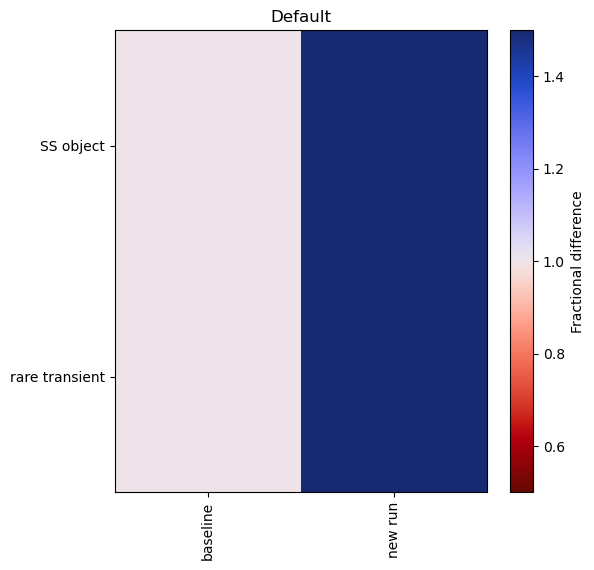

In [19]:
# The most extreme, going from 1-2% comleteness is seen as an improvement that
# could balance going from 100-50%

m1 = pd.DataFrame({'rare transient': 0.01, 'SS object': 0.500}, index=['baseline'])
m2 =  pd.DataFrame({'rare transient': 0.02, 'SS object': 1.0}, index=['new run'])
data = pd.concat([m1,m2])
fig, ax = maf.plot_run_metric_mesh(data, baseline_run='baseline')
ax.set_title('Default')

Text(0.5, 1.0, 'Default')

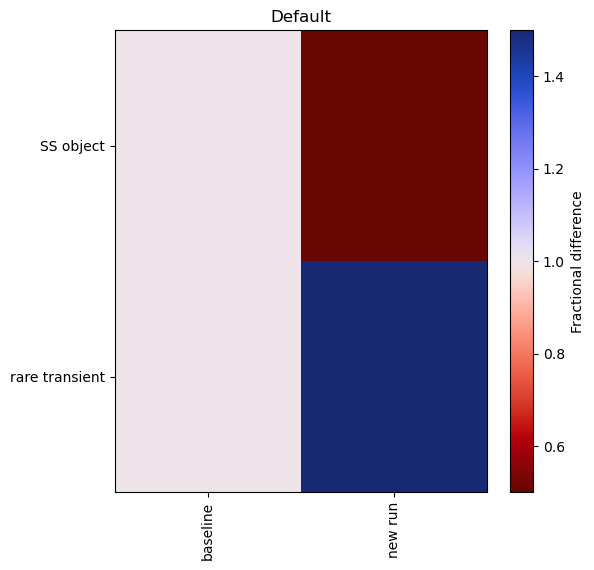

In [20]:
m1 = pd.DataFrame({'rare transient': 0.01, 'SS object': 1.0}, index=['baseline'])
m2 =  pd.DataFrame({'rare transient': 0.02, 'SS object': 0.5}, index=['new run'])
data = pd.concat([m1,m2])
fig, ax = maf.plot_run_metric_mesh(data, baseline_run='baseline')
ax.set_title('Default')